In [78]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

# globally available variables and their meanings
#                df - all raw CSV data
#          df_train - raw training data (80% of df)
#     df_train_feat - raw training features
#   df_train_labels - raw training labels
#           df_test - raw testing data (20% of df)
# df_train_feat_prepared - prepared training feature data

In [79]:
import zipfile
import io

# Get the data.
# Convert the data to a format you can easily manipulate (without changing the data itself).
# Ensure sensitive information is deleted or protected (e.g., anonymized).
# Data available at https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009
def load_data() -> pd.DataFrame:
    with zipfile.ZipFile('./red-wine-quality-cortez-et-al-2009.zip', 'r') as zip_ref:
        csv = zip_ref.read('winequality-red.csv')
        return pd.read_csv(io.BytesIO(csv))

df = load_data()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


| feature | significance |
|:--|:--|
| fixed acidity | most acids involved with wine or fixed or nonvolatile (do not evaporate readily) |
| volatile acidity | the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste |
| citric acid | found in small quantities, citric acid can add 'freshness' and flavor to wines |
| residual sugar | the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet |
| chlorides | the amount of salt in the wine |
| free sulfur dioxide | the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine |
| total sulfur dioxide | amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine |
| density | the density of water is close to that of water depending on the percent alcohol and sugar content |
| pH | describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale |
| sulfates | a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant |
| alcohol | the percent alcohol content of the wine |
| quality | output variable (based on sensory data, score between 0 and 10) |

In [80]:
# Check the size and type of data (time series, sample, geographical, etc.).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [81]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


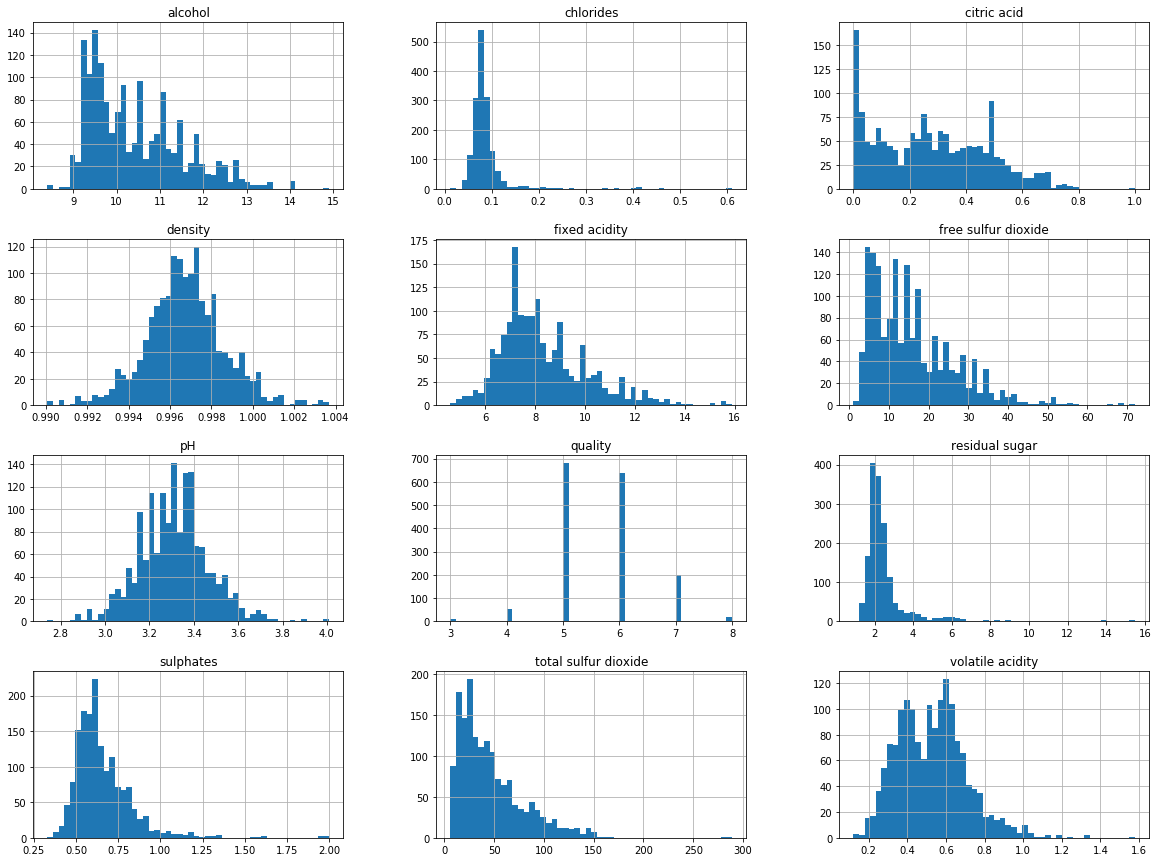

In [82]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [83]:
# Sample a test set, put it aside
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_index, test_index in sss.split(df, df['quality']):
    df_train, df_test = df.iloc[train_index], df.iloc[test_index]

# Check stratification
df_vc = df.quality.value_counts() / len(df)
df_train_vc = df_train.quality.value_counts() / len(df_train)
diff = np.abs(df_vc - df_train_vc)
pd.concat([df_vc, df_train_vc, diff], axis=1, keys=['all', 'training', 'abs diff'])

,all,training,abs diff
5,0.425891,0.426114,2.229697e-04
6,0.398999,0.398749,2.503519e-04
7,0.124453,0.124316,1.369112e-04
4,0.033146,0.032838,3.075613e-04
8,0.011257,0.011728,4.708768e-04
3,0.006254,0.006255,9.779372e-07


In [84]:
# % of missing values
for column in df_train.columns:
    num_na_rows = len(df[pd.isna(df[column])])
    pc_missing = num_na_rows / len(df)
    print('%s %2d%%' %(column, pc_missing))

fixed acidity  0%
volatile acidity  0%
citric acid  0%
residual sugar  0%
chlorides  0%
free sulfur dioxide  0%
total sulfur dioxide  0%
density  0%
pH  0%
sulphates  0%
alcohol  0%
quality  0%


In [85]:
# another way of checking missing values
sample_incomplete_rows = df_train[df_train.isnull().any(axis=1)]
print('Number of incomplete rows: %s' % len(sample_incomplete_rows))

Number of incomplete rows: 0


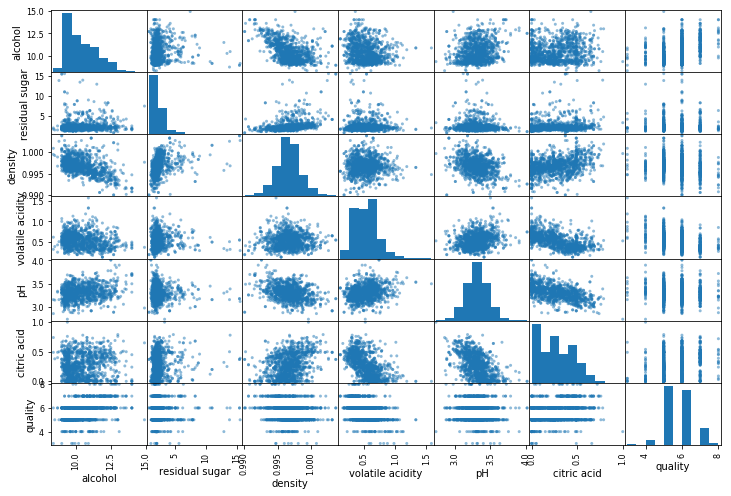

In [86]:
attrs = ['alcohol', 'residual sugar', 'density', 'volatile acidity', 'pH', 'citric acid', 'quality']
pd.plotting.scatter_matrix(df_train[attrs], figsize=(12, 8))
plt.show()

In [87]:
# Study the correlations between attributes.
# It appears alcohol positively correlates with quality, while volatile acidity negatively correlates with quality
df_train.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.467740
sulphates               0.250674
citric acid             0.228835
fixed acidity           0.114564
residual sugar          0.010882
free sulfur dioxide    -0.025114
pH                     -0.054642
chlorides              -0.134303
total sulfur dioxide   -0.165506
density                -0.187888
volatile acidity       -0.413596
Name: quality, dtype: float64

In [88]:
# prepare data for machine learning algorithms by separating labels from data
df_train_feat = df_train.drop(columns=['quality'])
df_train_labels = df_train['quality'].copy()

df_train_feat.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
447,9.3,0.480,0.29,2.1,0.127,6.0,16.0,0.99680,3.22,0.72,11.2
546,7.5,0.550,0.24,2.0,0.078,10.0,28.0,0.99830,3.45,0.78,9.5
724,7.5,1.115,0.10,3.1,0.086,5.0,12.0,0.99580,3.54,0.60,11.2
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
859,6.8,0.560,0.22,1.8,0.074,15.0,24.0,0.99438,3.40,0.82,11.2


In [89]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

df_train_feat_prepared = pipeline.fit_transform(df_train_feat)
df_train_feat_prepared.shape

(1279, 11)

In [90]:
# quick n' dirty linear regression
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df_train_feat_prepared, df_train_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [91]:
some_feat = df.drop(columns=['quality']).iloc[:5]
some_labels = df.iloc[:5]['quality']
some_feat_prepared = pipeline.fit_transform(some_feat)
print('Predicted:\t', lin_reg.predict(some_feat_prepared))
print('Actual:\t\t', list(some_labels))

Predicted:	 [5.11093431 5.88236945 5.8722842  6.20956061 5.11093431]
Actual:		 [5, 5, 5, 6, 5]


In [92]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

df_train_predict = lin_reg.predict(df_train_feat_prepared)
lin_mse = mean_squared_error(df_train_labels, df_train_predict)
lin_rmse = np.sqrt(lin_mse)
print('mean squared error', lin_rmse)

lin_mae = mean_absolute_error(df_train_labels, df_train_predict)
print('mean absolute error', lin_mae)
lin_reg

mean squared error 0.6408037373323325
mean absolute error 0.4989489705547471


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [93]:
# quick n' dirty decision tree
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(df_train_feat_prepared, df_train_labels)
df_train_predict = tree_reg.predict(df_train_feat_prepared)
tree_mse = mean_squared_error(df_train_labels, df_train_predict)
tree_rmse = np.sqrt(tree_mse)
print('mean squared error', tree_rmse)

tree_mae = mean_absolute_error(df_train_labels, df_train_predict)
print('mean absolute error', tree_mae)
tree_reg

mean squared error 0.0
mean absolute error 0.0


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [94]:
# quick n' dirty random forest
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(df_train_feat_prepared, df_train_labels)
df_train_predict = forest_reg.predict(df_train_feat_prepared)
forest_mse = mean_squared_error(y_pred=df_train_predict, y_true=df_train_labels)
forest_rmse = np.sqrt(forest_mse)
print('mean squared error', forest_rmse)

forest_mae = mean_absolute_error(y_pred=df_train_predict, y_true=df_train_labels)
print('mean absolute error', forest_mae)
forest_reg

mean squared error 0.24922083427692335
mean absolute error 0.1652853792025019


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [95]:
# quick n' dirty SVM
from sklearn.svm import SVR

svm_reg = SVR(kernel='linear')
svm_reg.fit(df_train_feat_prepared, df_train_labels)
df_train_predict = svm_reg.predict(df_train_feat_prepared)
svm_mse = mean_squared_error(y_pred=df_train_predict, y_true=df_train_labels)
svm_rmse = np.sqrt(svm_mse)
print('mean squared error', svm_rmse)

svm_mae = mean_absolute_error(df_train_labels, df_train_predict)
print('mean absolute error', svm_mae)
svm_reg

mean squared error 0.6475386782802667
mean absolute error 0.4926785309519492


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [96]:
def display_scores(scores):
    print('Scores', scores)
    print('Mean', scores.mean())
    print('Standard Deviation', scores.std())

In [97]:
from sklearn.model_selection import cross_val_score

lin_reg_scores = cross_val_score(lin_reg, df_train_feat_prepared, df_train_labels,
                        scoring='neg_mean_squared_error', cv=10, n_jobs=4)
lin_rmse_scores = np.sqrt(-lin_reg_scores)

display_scores(lin_rmse_scores)

Scores [0.66983124 0.63475264 0.62767697 0.66367591 0.68970195 0.65324671
 0.59620443 0.66230174 0.68941305 0.60458568]
Mean 0.649139031096061
Standard Deviation 0.030905706299044582


In [98]:
tree_reg_scores = cross_val_score(tree_reg, df_train_feat_prepared, df_train_labels,
                                  scoring='neg_mean_squared_error', cv=10, n_jobs=4)
tree_rmse_scores = np.sqrt(-tree_reg_scores)

display_scores(tree_rmse_scores)

Scores [0.7756046  0.72886899 0.76546554 0.76034532 0.80039053 0.81967982
 0.73420876 0.8291562  0.75       0.72633261]
Mean 0.7690052357621063
Standard Deviation 0.03507994986139908


In [99]:
forest_reg_scores = cross_val_score(forest_reg, df_train_feat_prepared, df_train_labels,
                                  scoring='neg_mean_squared_error', cv=10, n_jobs=4)
forest_rmse_scores = np.sqrt(-forest_reg_scores)
display_scores(forest_reg_scores)
# Question: Why are the scores / mean negative?

Scores [-0.35570313 -0.3846875  -0.36125    -0.48054687 -0.42453125 -0.4053125
 -0.24890625 -0.45921875 -0.35882812 -0.3607874 ]
Mean -0.38397717765748035
Standard Deviation 0.06149607848862449


In [100]:
svm_reg_scores = cross_val_score(svm_reg, df_train_feat_prepared, df_train_labels,
                                 scoring='neg_mean_squared_error', cv=10, n_jobs=4)
svm_rmse_scores = np.sqrt(-svm_reg_scores)
display_scores(svm_rmse_scores)

Scores [0.67409941 0.63645757 0.62708252 0.68494436 0.69328836 0.6501861
 0.58158855 0.66503155 0.68518601 0.62702456]
Mean 0.6524888974354315
Standard Deviation 0.03315790883216568


In [101]:
# # It looks like the most promising models are Linear Regression, SVM and Random Forest
# # Let do grid search cross validation with SVM to find best hyperparameter combination
# from sklearn.model_selection import GridSearchCV

# svm_param_grid = [
#     {
#         'C': [1., 3., 10., 30., 100., 300., 1000., 3000.], 
#         'kernel': ['linear']
#     },
#     {
#         'C': [1., 3., 10., 30., 100., 300., 1000., 3000.], 
#         'kernel': ['rbf'], 
#         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]
#     }
# ]

# svm_reg = SVR()
# svm_grid_search = GridSearchCV(svm_reg, svm_param_grid, scoring='neg_mean_squared_error', n_jobs=4, cv=5, verbose=2)
# svm_grid_search.fit(df_train_feat_prepared, df_train_labels)

In [102]:
# svm_grid_search.best_params_  # {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}

In [103]:
# svm_cv_results = svm_grid_search.cv_results_
# svm_sorted_scores = []
# for mean_score, params in zip(svm_cv_results['mean_test_score'], svm_cv_results['params']):
#     svm_sorted_scores.append([np.sqrt(-mean_score), params])
# sorted(svm_sorted_scores, key=lambda s: s[0])

In [104]:
# Randomized Search cross validation with RandomForestRegressor model
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(1, 300),
    'max_features': randint(1, 8)
}

forest_reg = RandomForestRegressor()
forest_rnd_search = RandomizedSearchCV(forest_reg, param_distributions, cv=5, n_iter=100,
                                       scoring='neg_mean_squared_error', n_jobs=4, verbose=2)
forest_rnd_search.fit(df_train_feat_prepared, df_train_labels)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] max_features=4, n_estimators=61 .................................
[CV] max_features=4, n_estimators=61 .................................
[CV] max_features=4, n_estimators=61 .................................
[CV] max_features=4, n_estimators=61 .................................
[CV] .................. max_features=4, n_estimators=61, total=   0.2s
[CV] max_features=4, n_estimators=61 .................................
[CV] .................. max_features=4, n_estimators=61, total=   0.2s
[CV] .................. max_features=4, n_estimators=61, total=   0.2s
[CV] max_features=4, n_estimators=125 ................................
[CV] max_features=4, n_estimators=125 ................................
[CV] .................. max_features=4, n_estimators=61, total=   0.2s
[CV] max_features=4, n_estimators=125 ................................
[CV] .................. max_features=4, n_estimators=61, total=   0.2s
[CV] max_featu

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    3.8s


[CV] ................. max_features=4, n_estimators=122, total=   0.4s
[CV] max_features=5, n_estimators=194 ................................
[CV] ................. max_features=5, n_estimators=194, total=   0.6s
[CV] max_features=5, n_estimators=194 ................................
[CV] ................. max_features=5, n_estimators=194, total=   0.6s
[CV] max_features=3, n_estimators=72 .................................
[CV] ................. max_features=5, n_estimators=194, total=   0.6s
[CV] max_features=3, n_estimators=72 .................................
[CV] .................. max_features=3, n_estimators=72, total=   0.2s
[CV] max_features=3, n_estimators=72 .................................
[CV] .................. max_features=3, n_estimators=72, total=   0.2s
[CV] max_features=3, n_estimators=72 .................................
[CV] ................. max_features=5, n_estimators=194, total=   0.6s
[CV] max_features=3, n_estimators=72 .................................
[CV] .

[CV] ................. max_features=5, n_estimators=112, total=   0.4s
[CV] max_features=3, n_estimators=169 ................................
[CV] ................. max_features=5, n_estimators=112, total=   0.4s
[CV] max_features=3, n_estimators=169 ................................
[CV] ................. max_features=5, n_estimators=112, total=   0.4s
[CV] max_features=3, n_estimators=169 ................................
[CV] ................. max_features=3, n_estimators=169, total=   0.4s
[CV] max_features=3, n_estimators=169 ................................
[CV] ................. max_features=3, n_estimators=169, total=   0.4s
[CV] max_features=6, n_estimators=89 .................................
[CV] ................. max_features=3, n_estimators=169, total=   0.4s
[CV] max_features=6, n_estimators=89 .................................
[CV] ................. max_features=3, n_estimators=169, total=   0.4s
[CV] max_features=6, n_estimators=89 .................................
[CV] .

[CV] ................. max_features=6, n_estimators=186, total=   0.6s
[CV] max_features=6, n_estimators=186 ................................
[CV] ................. max_features=6, n_estimators=186, total=   0.6s
[CV] ................. max_features=6, n_estimators=186, total=   0.6s
[CV] max_features=7, n_estimators=163 ................................
[CV] max_features=7, n_estimators=163 ................................
[CV] ................. max_features=6, n_estimators=186, total=   0.6s
[CV] max_features=7, n_estimators=163 ................................


[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:   16.0s


[CV] ................. max_features=6, n_estimators=186, total=   0.6s
[CV] max_features=7, n_estimators=163 ................................
[CV] ................. max_features=7, n_estimators=163, total=   0.6s
[CV] max_features=7, n_estimators=163 ................................
[CV] ................. max_features=7, n_estimators=163, total=   0.6s
[CV] max_features=2, n_estimators=2 ..................................
[CV] ................... max_features=2, n_estimators=2, total=   0.0s
[CV] max_features=2, n_estimators=2 ..................................
[CV] ................... max_features=2, n_estimators=2, total=   0.0s
[CV] max_features=2, n_estimators=2 ..................................
[CV] ................... max_features=2, n_estimators=2, total=   0.0s
[CV] max_features=2, n_estimators=2 ..................................
[CV] ................... max_features=2, n_estimators=2, total=   0.0s
[CV] max_features=2, n_estimators=2 ..................................
[CV] .

[CV] .................. max_features=5, n_estimators=83, total=   0.3s
[CV] max_features=5, n_estimators=79 .................................
[CV] .................. max_features=4, n_estimators=23, total=   0.1s
[CV] max_features=5, n_estimators=79 .................................
[CV] .................. max_features=4, n_estimators=23, total=   0.1s
[CV] max_features=5, n_estimators=79 .................................
[CV] .................. max_features=5, n_estimators=79, total=   0.2s
[CV] max_features=5, n_estimators=79 .................................
[CV] .................. max_features=5, n_estimators=79, total=   0.2s
[CV] max_features=4, n_estimators=185 ................................
[CV] .................. max_features=5, n_estimators=79, total=   0.2s
[CV] max_features=4, n_estimators=185 ................................
[CV] .................. max_features=5, n_estimators=79, total=   0.2s
[CV] max_features=4, n_estimators=185 ................................
[CV] .

[CV] ................. max_features=2, n_estimators=257, total=   0.5s
[CV] max_features=3, n_estimators=46 .................................
[CV] .................. max_features=3, n_estimators=46, total=   0.1s
[CV] max_features=6, n_estimators=72 .................................
[CV] .................. max_features=3, n_estimators=46, total=   0.1s
[CV] max_features=6, n_estimators=72 .................................
[CV] ................. max_features=2, n_estimators=257, total=   0.5s
[CV] max_features=6, n_estimators=72 .................................
[CV] .................. max_features=3, n_estimators=46, total=   0.1s
[CV] max_features=6, n_estimators=72 .................................
[CV] .................. max_features=6, n_estimators=72, total=   0.2s
[CV] max_features=6, n_estimators=72 .................................
[CV] .................. max_features=6, n_estimators=72, total=   0.2s
[CV] max_features=6, n_estimators=41 .................................
[CV] .

[CV] ................. max_features=7, n_estimators=260, total=   0.9s
[CV] max_features=6, n_estimators=196 ................................
[CV] ................. max_features=6, n_estimators=196, total=   0.6s
[CV] max_features=6, n_estimators=196 ................................
[CV] ................. max_features=6, n_estimators=196, total=   0.6s
[CV] max_features=6, n_estimators=196 ................................
[CV] ................. max_features=6, n_estimators=196, total=   0.6s
[CV] max_features=1, n_estimators=49 .................................
[CV] .................. max_features=1, n_estimators=49, total=   0.1s
[CV] max_features=1, n_estimators=49 .................................
[CV] ................. max_features=7, n_estimators=260, total=   0.9s
[CV] max_features=1, n_estimators=49 .................................
[CV] .................. max_features=1, n_estimators=49, total=   0.1s
[CV] max_features=1, n_estimators=49 .................................
[CV] .

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   37.9s


[CV] ................. max_features=3, n_estimators=215, total=   0.5s
[CV] max_features=2, n_estimators=263 ................................
[CV] ................. max_features=3, n_estimators=215, total=   0.5s
[CV] max_features=2, n_estimators=263 ................................
[CV] ................. max_features=2, n_estimators=263, total=   0.5s
[CV] max_features=2, n_estimators=263 ................................
[CV] ................. max_features=2, n_estimators=263, total=   0.5s
[CV] max_features=5, n_estimators=255 ................................
[CV] ................. max_features=2, n_estimators=263, total=   0.5s
[CV] max_features=5, n_estimators=255 ................................
[CV] ................. max_features=2, n_estimators=263, total=   0.5s
[CV] max_features=5, n_estimators=255 ................................
[CV] ................. max_features=2, n_estimators=263, total=   0.5s
[CV] max_features=5, n_estimators=255 ................................
[CV] .

[CV] .................. max_features=5, n_estimators=83, total=   0.3s
[CV] max_features=4, n_estimators=47 .................................
[CV] ................. max_features=4, n_estimators=183, total=   0.5s
[CV] max_features=4, n_estimators=47 .................................
[CV] .................. max_features=5, n_estimators=83, total=   0.3s
[CV] max_features=4, n_estimators=47 .................................
[CV] .................. max_features=4, n_estimators=47, total=   0.1s
[CV] max_features=4, n_estimators=47 .................................
[CV] .................. max_features=5, n_estimators=83, total=   0.3s
[CV] max_features=4, n_estimators=47 .................................
[CV] .................. max_features=4, n_estimators=47, total=   0.1s
[CV] max_features=1, n_estimators=122 ................................
[CV] .................. max_features=4, n_estimators=47, total=   0.1s
[CV] max_features=1, n_estimators=122 ................................
[CV] .

[CV] ................. max_features=5, n_estimators=103, total=   0.3s
[CV] max_features=4, n_estimators=270 ................................
[CV] ................. max_features=4, n_estimators=270, total=   0.7s
[CV] max_features=4, n_estimators=270 ................................
[CV] ................. max_features=4, n_estimators=270, total=   0.7s
[CV] max_features=2, n_estimators=221 ................................
[CV] ................. max_features=4, n_estimators=270, total=   0.7s
[CV] max_features=2, n_estimators=221 ................................
[CV] ................. max_features=4, n_estimators=270, total=   0.7s
[CV] max_features=2, n_estimators=221 ................................
[CV] ................. max_features=2, n_estimators=221, total=   0.5s
[CV] ................. max_features=2, n_estimators=221, total=   0.4s
[CV] max_features=2, n_estimators=221 ................................
[CV] max_features=2, n_estimators=221 ................................
[CV] .

[Parallel(n_jobs=4)]: Done 500 out of 500 | elapsed:   55.1s finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=4,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x118d599b0>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x118d596a0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_mean_squared_error',
          verbose=2)

In [105]:
forest_rnd_search.best_params_  # {'max_features': 3, 'n_estimators': 271}
forest_cv_results = forest_rnd_search.cv_results_
forest_sorted_scores = []
for mean_score, params in zip(forest_cv_results['mean_test_score'], forest_cv_results['params']):
    forest_sorted_scores.append([np.sqrt(-mean_score), params])
sorted(forest_sorted_scores, key=lambda s: s[0])

[[0.5914309374889336, {'max_features': 4, 'n_estimators': 185}],
 [0.5916802648010391, {'max_features': 5, 'n_estimators': 255}],
 [0.5917559216255152, {'max_features': 3, 'n_estimators': 233}],
 [0.5917563675826779, {'max_features': 4, 'n_estimators': 126}],
 [0.5921875436563806, {'max_features': 2, 'n_estimators': 263}],
 [0.592296779361129, {'max_features': 3, 'n_estimators': 143}],
 [0.5923117050913099, {'max_features': 2, 'n_estimators': 52}],
 [0.5927837260559993, {'max_features': 3, 'n_estimators': 272}],
 [0.5928414240129487, {'max_features': 4, 'n_estimators': 244}],
 [0.5929631916560564, {'max_features': 4, 'n_estimators': 122}],
 [0.5931151466291245, {'max_features': 5, 'n_estimators': 112}],
 [0.5935665446718392, {'max_features': 4, 'n_estimators': 254}],
 [0.5935929705811076, {'max_features': 5, 'n_estimators': 131}],
 [0.5935930677726177, {'max_features': 4, 'n_estimators': 183}],
 [0.5936309128342293, {'max_features': 4, 'n_estimators': 125}],
 [0.5937753511392666, {'max

In [106]:
feat_importances = list(
    zip(forest_rnd_search.best_estimator_.feature_importances_, df_train_feat.columns))
sorted(feat_importances, key=lambda f: f[0], reverse=True)

[(0.20318763081854152, 'alcohol'),
 (0.14549319025303653, 'sulphates'),
 (0.1321387369167474, 'volatile acidity'),
 (0.08695587666798742, 'density'),
 (0.07710038709210551, 'total sulfur dioxide'),
 (0.06924817888739176, 'chlorides'),
 (0.06584521899712069, 'citric acid'),
 (0.06156726195104113, 'fixed acidity'),
 (0.05734368371965669, 'pH'),
 (0.05365025297368855, 'residual sugar'),
 (0.04746958172268266, 'free sulfur dioxide')]

In [107]:
# Looks like RandomForestRegressor performed best during cross validation
final_model = forest_rnd_search.best_estimator_

df_test_feat = df_test.drop('quality', axis=1)
df_test_labels = df_test['quality'].copy()

df_test_feat_prepared = pipeline.fit_transform(df_test_feat)
final_predictions = final_model.predict(df_test_feat_prepared)

final_mse = mean_squared_error(y_pred=final_predictions, y_true=df_test_labels)
final_rmse = np.sqrt(final_mse)
final_rmse

0.5937936097552089

In [109]:
# persist the model
from sklearn.externals import joblib

full_pipeline_with_predictor = Pipeline([
    ('preparation', pipeline),
    ('forest_reg', final_model)
])

joblib.dump(full_pipeline_with_predictor, 'final_model.pkl')

['final_model.pkl']